# Logistic Regression Models Using Resampling

In [4]:
!pip install imblearn

You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, NearMiss

In [6]:
# FUNCTION:

def ridgereg_cv(df, target, method):
    # Logistic regression with ridge 'l2' penalty. Hyperparameter tuning.
    X = df.drop(target, axis=1)
    y = df[target]
    
    # training and testing sets
    X_sample, X_test, y_sample, y_test = \
    train_test_split(X, y, random_state = 42)
    
    if method == 'ros':
        X_train, y_train = RandomOverSampler(random_state=0).fit_resample(X_sample, y_sample)
    if method == 'ADASYN':
        X_train, y_train = ADASYN(random_state=0).fit_resample(X_sample, y_sample)        
    if method == 'SMOTE':
        X_train, y_train = SMOTE(random_state=0).fit_resample(X_sample, y_sample)        
    if method == 'rus':
        X_train, y_train = RandomUnderSampler(random_state=0).fit_resample(X_sample, y_sample)
    if method == 'cc':
        X_train, y_train = ClusterCentroids(random_state=0).fit_resample(X_sample, y_sample)   
    if method == 'NearMiss':
        X_train, y_train = NearMiss(random_state=0).fit_resample(X_sample, y_sample)
    
    param_grid = {'solver': ['lbfgs', 'sag', 'saga'],
                'C': [int(x) for x in np.logspace(0, 1, num = 10)]}
    
    # Instantiate model and grid search
    lgr = LogisticRegression(penalty='l2', random_state=30)
    gm_cv = RandomizedSearchCV(lgr, param_grid, n_iter = 15, cv = 3, random_state=30)
    gm_cv.fit(X_train, y_train)

    # Scores for training and testing
    y_predict_train = gm_cv.predict(X_train)
    print("Train accuracy score:", accuracy_score(y_predict_train, y_train))

    y_predict_test = gm_cv.predict(X_test)
    print("Test accuracy score",accuracy_score(y_predict_test, y_test))

    # Classification reports
    print("\n Training Classification Report:")
    print(classification_report(y_train, y_predict_train))

    print("\n Test Classification Report:")
    print(classification_report(y_test, y_predict_test))
    
    # Best Model
    print(gm_cv.best_estimator_)
    
def lassoreg_cv(df, target, method):
    # Logistic regression with lasso 'l1' penalty. Hyperparameter tuning
    X = df.drop(target, axis=1)
    y = df[target]
    
    # training and testing sets
    X_sample, X_test, y_sample, y_test = \
    train_test_split(X, y, random_state = 42)
    
    if method == 'ros':
        X_train, y_train = RandomOverSampler(random_state=0).fit_resample(X_sample, y_sample)
    if method == 'ADASYN':
        X_train, y_train = ADASYN(random_state=0).fit_resample(X_sample, y_sample)        
    if method == 'SMOTE':
        X_train, y_train = SMOTE(random_state=0).fit_resample(X_sample, y_sample)        
    if method == 'rus':
        X_train, y_train = RandomUnderSampler(random_state=0).fit_resample(X_sample, y_sample)
    if method == 'cc':
        X_train, y_train = ClusterCentroids(random_state=0).fit_resample(X_sample, y_sample)   
    if method == 'NearMiss':
        X_train, y_train = NearMiss(random_state=0).fit_resample(X_sample, y_sample)
    
    param_grid = {'solver': ['liblinear', 'saga'],
              'C': [int(x) for x in np.logspace(0, 1, num = 10)]} 
    
    # Instantiate model and grid search
    lgr = LogisticRegression(penalty='l1', class_weight = "balanced", random_state=30)
    gm_cv = RandomizedSearchCV(lgr, param_grid, n_iter = 15, cv = 3, random_state=30)
    gm_cv.fit(X_train, y_train)

    # Scores for training and testing
    y_predict_train = gm_cv.predict(X_train)
    print("Train accuracy score:", round(accuracy_score(y_predict_train, y_train), 3))

    y_predict_test = gm_cv.predict(X_test)
    print("Test accuracy score", round(accuracy_score(y_predict_test, y_test), 3))

    # Classification reports
    print("\n Training Classification Report:")
    print(classification_report(y_train, y_predict_train))

    print("\n Test Classification Report:")
    print(classification_report(y_test, y_predict_test))
    
    # Best estimator
    print(gm_cv.best_estimator_)

In [7]:
train_final_data = pd.read_csv('/Users/Julia/Documents/bootcamp/fraud_capstone/data_out/train_final_data.csv', low_memory=False)

In [6]:
train_final_data.head()

,ChronicCond_Alzheimer,ChronicCond_Cancer,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_Heartfailure,ChronicCond_IschemicHeart,ChronicCond_KidneyDisease,ChronicCond_ObstrPulmonary,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,County_0,County_1,County_10,County_100,County_11,County_110,County_111,County_113,County_117,County_120,County_130,County_131,County_14,County_140,County_141,County_150,County_160,County_161,County_170,County_180,County_190,County_191,County_194,County_20,County_200,County_210,County_211,County_212,County_213,County_220,County_221,County_222,County_223,County_224,County_230,County_240,County_241,County_25,County_250,...,proc_9764.0,proc_9784.0,proc_9787.0,proc_9789.0,proc_9805.0,proc_9815.0,proc_9851.0,proc_9903.0,proc_9904.0,proc_9905.0,proc_9906.0,proc_9907.0,proc_9910.0,proc_9914.0,proc_9915.0,proc_9916.0,proc_9917.0,proc_9918.0,proc_9919.0,proc_9920.0,proc_9921.0,proc_9922.0,proc_9923.0,proc_9925.0,proc_9926.0,proc_9928.0,proc_9929.0,proc_9938.0,proc_9939.0,proc_9952.0,proc_9955.0,proc_9959.0,proc_9960.0,proc_9961.0,proc_9962.0,proc_9969.0,proc_9971.0,proc_9972.0,proc_9973.0,proc_9974.0,proc_9975.0,proc_9978.0,proc_9979.0,proc_9982.0,proc_9984.0,proc_9986.0,proc_9992.0,proc_9995.0,proc_9998.0,proc_9999.0
0,0.365759,0.233463,0.451362,0.754864,0.564202,0.762646,0.474708,0.400778,0.272374,0.330739,0.105058,0.011673,0.0,0.011673,0.011673,0.0,0.0,0.0,0.0,0.0,0.0,0.015564,0.0,0.0,0.003891,0.0,0.07393,0.000000,0.0,0.0,0.003891,0.011673,0.0,0.0,0.003891,0.0,0.000000,0.0,0.0,0.0,0.011673,0.0,0.0,0.0,0.0,0.007782,0.011673,0.0,0.0,0.054475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.426901,0.175439,0.444444,0.730994,0.649123,0.807018,0.473684,0.380117,0.280702,0.345029,0.076023,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.023392,0.0,0.0,0.005848,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.070175,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.070175,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.429515,0.229075,0.451542,0.685022,0.596916,0.799559,0.398678,0.341410,0.370044,0.290749,0.063877,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.156388,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.496454,0.191489,0.446809,0.773050,0.624113,0.794326,0.460993,0.304965,0.326241,0.326241,0.099291,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.014184,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.014184,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.322917,0.156250,0.385417,0.645833,0.645833,0.687500,0.395833,0.302083,0.291667,0.270833,0.104167,0.000000,0.0,0.031250,0.031250,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.0,0.0,0.000000,0.0,0.00000,0.135417,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.010417,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# We are dealing with an imbalanced data set.
train_final_data[['PotentialFraud', 'Provider']].groupby('PotentialFraud').count()

,Provider
PotentialFraud,
0,4904
1,506


### Logistic regression with varied resampling methods, to help with class imbalanced. Under-sampling methods worked best.
##### Key models  


###### Key models:  

* our best models, which implemented random undersampling, had a .20 increase in class 1 recall, consistent class 1 precision, and marginal decrease in overall accuracy.
* near miss undersampling resulted in a higher class 1 recall of .98, but overall accuracy decreased .331. 

type, undersampling method | Class 1 Precision | Class 1 Recall | Accuracy Score |
------- | ------------ | -------------- | -------------- | 
BEST: lasso tuned, random under sampling | 0.46 | 0.75 | 0.885
BEST: ridge tuned, random under sampling | 0.46 | 0.75 | 0.885
ridge tuned, near miss | 0.18 | 0.98 | 0.554|
* lasso logistic tuned | .46   | .55 | .897
* ridge logistic tuned | .46 | .55 | .897

In [7]:
train_final_data[['PotentialFraud', 'Provider']].groupby('PotentialFraud').count()

,Provider
PotentialFraud,
0,4904
1,506


### Oversampling Techniques

In [8]:
lassoreg_cv(train_final_data, 'PotentialFraud', 'ros')

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia

Train accuracy score: 1.0
Test accuracy score 0.869

 Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3688
           1       1.00      1.00      1.00      3688

    accuracy                           1.00      7376
   macro avg       1.00      1.00      1.00      7376
weighted avg       1.00      1.00      1.00      7376


 Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1216
           1       0.33      0.28      0.31       137

    accuracy                           0.87      1353
   macro avg       0.63      0.61      0.62      1353
weighted avg       0.86      0.87      0.86      1353

LogisticRegression(C=10, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
             

In [9]:
lassoreg_cv(train_final_data, 'PotentialFraud', 'ADASYN')

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia

Train accuracy score: 1.0
Test accuracy score 0.86

 Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3688
           1       1.00      1.00      1.00      3799

    accuracy                           1.00      7487
   macro avg       1.00      1.00      1.00      7487
weighted avg       1.00      1.00      1.00      7487


 Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1216
           1       0.29      0.26      0.27       137

    accuracy                           0.86      1353
   macro avg       0.60      0.59      0.60      1353
weighted avg       0.85      0.86      0.86      1353

LogisticRegression(C=5, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
               

In [10]:
lassoreg_cv(train_final_data, 'PotentialFraud', 'SMOTE')

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia

Train accuracy score: 1.0
Test accuracy score 0.866

 Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3688
           1       1.00      1.00      1.00      3688

    accuracy                           1.00      7376
   macro avg       1.00      1.00      1.00      7376
weighted avg       1.00      1.00      1.00      7376


 Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1216
           1       0.33      0.32      0.33       137

    accuracy                           0.87      1353
   macro avg       0.63      0.62      0.63      1353
weighted avg       0.86      0.87      0.87      1353

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
              

### Undersampling Techniques

In [11]:
lassoreg_cv(train_final_data, 'PotentialFraud', 'rus')

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia

Train accuracy score: 0.942
Test accuracy score 0.885

 Training Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       369
           1       0.99      0.89      0.94       369

    accuracy                           0.94       738
   macro avg       0.95      0.94      0.94       738
weighted avg       0.95      0.94      0.94       738


 Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1216
           1       0.46      0.75      0.57       137

    accuracy                           0.88      1353
   macro avg       0.71      0.83      0.75      1353
weighted avg       0.92      0.88      0.90      1353

LogisticRegression(C=3, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
            

In [12]:
lassoreg_cv(train_final_data, "PotentialFraud", "cc")

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia

Train accuracy score: 0.927
Test accuracy score 0.806

 Training Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       369
           1       0.95      0.91      0.93       369

    accuracy                           0.93       738
   macro avg       0.93      0.93      0.93       738
weighted avg       0.93      0.93      0.93       738


 Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88      1216
           1       0.28      0.59      0.38       137

    accuracy                           0.81      1353
   macro avg       0.61      0.71      0.63      1353
weighted avg       0.88      0.81      0.83      1353

LogisticRegression(C=3, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
            

In [13]:
lassoreg_cv(train_final_data, "PotentialFraud", "NearMiss")

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia

Train accuracy score: 0.977
Test accuracy score 0.664

 Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       369
           1       1.00      0.95      0.98       369

    accuracy                           0.98       738
   macro avg       0.98      0.98      0.98       738
weighted avg       0.98      0.98      0.98       738


 Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.63      0.77      1216
           1       0.22      0.93      0.36       137

    accuracy                           0.66      1353
   macro avg       0.60      0.78      0.57      1353
weighted avg       0.91      0.66      0.73      1353

LogisticRegression(C=3, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
            

### Undersampling with Ridge Regression

In [17]:
ridgereg_cv(train_final_data, 'PotentialFraud', 'rus')

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Julia/miniconda3/envs/adv

Train accuracy score: 0.9417344173441734
Test accuracy score 0.88470066518847

 Training Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       369
           1       0.99      0.89      0.94       369

    accuracy                           0.94       738
   macro avg       0.95      0.94      0.94       738
weighted avg       0.95      0.94      0.94       738


 Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1216
           1       0.46      0.75      0.57       137

    accuracy                           0.88      1353
   macro avg       0.71      0.83      0.75      1353
weighted avg       0.92      0.88      0.90      1353

LogisticRegression(C=7, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty=

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [15]:
#top performing model
ridgereg_cv(train_final_data, 'PotentialFraud', 'cc')

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Julia/miniconda3/envs/adv

Train accuracy score: 0.926829268292683
Test accuracy score 0.8056171470805618

 Training Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       369
           1       0.95      0.91      0.93       369

    accuracy                           0.93       738
   macro avg       0.93      0.93      0.93       738
weighted avg       0.93      0.93      0.93       738


 Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88      1216
           1       0.28      0.59      0.38       137

    accuracy                           0.81      1353
   macro avg       0.61      0.71      0.63      1353
weighted avg       0.88      0.81      0.83      1353

LogisticRegression(C=7, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty

In [16]:
ridgereg_cv(train_final_data, 'PotentialFraud', 'NearMiss')

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Julia/miniconda3/envs/adv

Train accuracy score: 1.0
Test accuracy score 0.5543237250554324

 Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00       369

    accuracy                           1.00       738
   macro avg       1.00      1.00      1.00       738
weighted avg       1.00      1.00      1.00       738


 Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.51      0.67      1216
           1       0.18      0.98      0.31       137

    accuracy                           0.55      1353
   macro avg       0.59      0.74      0.49      1353
weighted avg       0.91      0.55      0.63      1353

LogisticRegression(C=7, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
       

In [30]:
# BEST MODEL FEATURE IMPORTANCES

X = train_final_data.drop("PotentialFraud", axis=1)
y = train_final_data["PotentialFraud"]

# training and testing sets
X_sample, X_test, y_sample, y_test = \
train_test_split(X, y, random_state = 42, stratify=y)
X_train, y_train = RandomUnderSampler(random_state=0).fit_resample(X_sample, y_sample)


bestmodel = LogisticRegression(C=3, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=30, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

bestmodel.fit(X_train, y_train)

feature_frame = pd.DataFrame({'Importance':i for i in bestmodel.coef_})
st_dv = [i for i in np.std(X_train, 0)]
feature_array = feature_frame['Importance'].values * st_dv
feature_frame['Importance'] = feature_array
feature_frame['Variable'] = X.columns

pd.set_option('display.max_rows', 1001)
print(feature_frame.sort_values('Importance', ascending=False).head(100))


       Importance                       Variable
12067    0.336890                       in_c_854
11663    0.299544                       in_c_309
12077    0.232808                       in_c_867
12148    0.228298                       in_c_983
11620    0.225878                       in_c_251
335      0.213491    Mean_InscClaimAmtReimbursed
11612    0.206222                       in_c_243
333      0.204890  Mean_IPAnnualReimbursementAmt
11640    0.204276                       in_c_286
11591    0.196688                       in_c_222
11588    0.192800                       in_c_219
11567    0.192328                       in_c_192
11594    0.182433                       in_c_225
11653    0.179927                       in_c_299
12130    0.177822                       in_c_950
11423    0.175631                       in_c_001
11430    0.173405                       in_c_008
11562    0.173224                       in_c_187
11424    0.172189                       in_c_002
11613    0.170132   

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


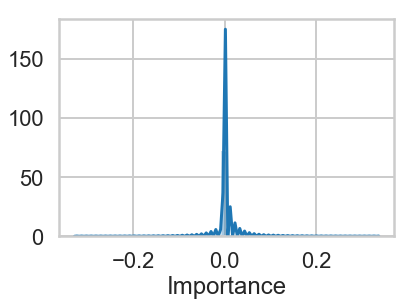

In [9]:
sns.distplot(feature_frame['Importance'])